# The Sparks Foundation - Data Science and Business Analystics Internship

**Task 2 :- Prediction using Unsupervised Machine Learning (ML)**

**In this task, we will use the iris dataset,to predict the optimum number of cluster.**

**Author:- Prince Kumar Singh**

**import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

**Read the data set**

In [2]:
data = pd.read_csv('E:\\pandas\\the spark foundation project\\Task 2\\Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Data Visualization**

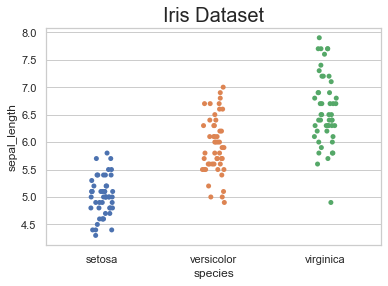

In [7]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x ='species',y = 'sepal_length',data = iris, size=5);
plt.title('Iris Dataset', fontsize=20)
plt.show()

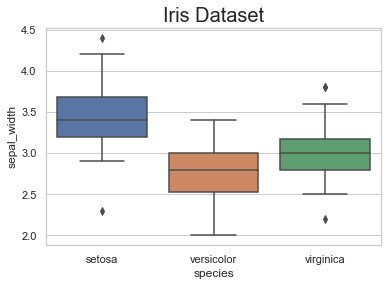

In [8]:
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title('Iris Dataset', fontsize=20)
plt.show()

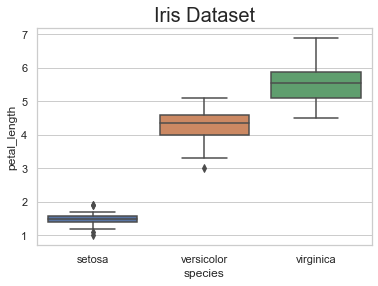

In [9]:
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Iris Dataset', fontsize=20)
plt.show()

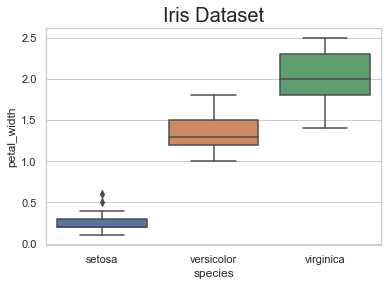

In [10]:
sns.boxplot(x='species', y='petal_width', data=iris)
plt.title('Iris Dataset', fontsize=20)
plt.show()

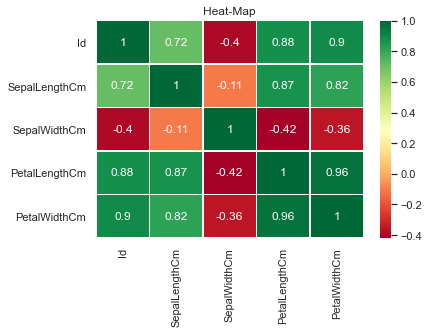

In [11]:
#This is needed for the analysis of two variables for determining the empirical relationship between them.

sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',linewidths=.5)
plt.title("Heat-Map")
plt.show()

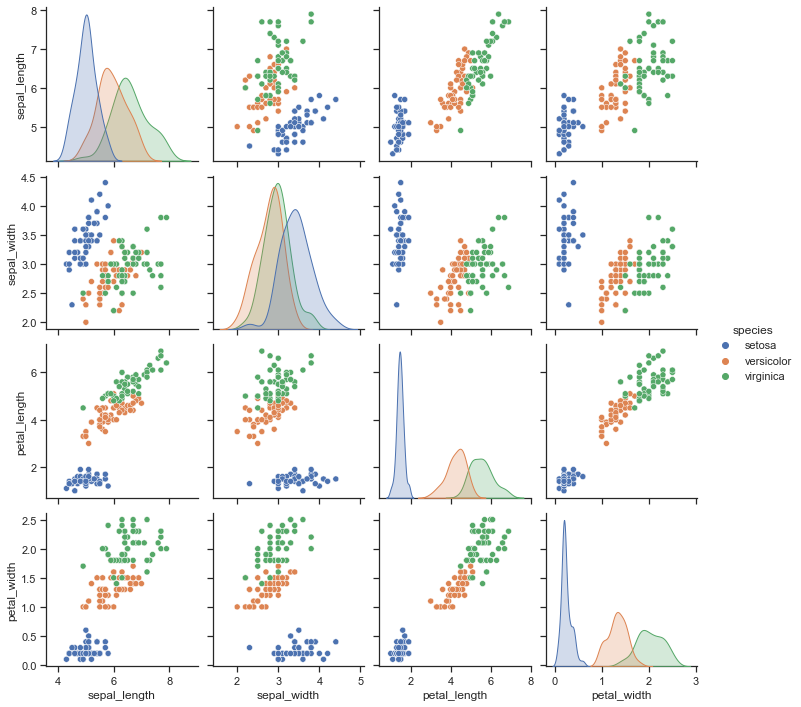

In [18]:
sns.set(style='ticks', color_codes=True)
iris = sns.load_dataset('iris')
g = sns.pairplot(iris, hue='species')
plt.show()

**Pairplots are a really simple way to visualize relationships between each variable. It produces a matrix of relationships between each variable in the data for an instant examination of our data.**

**Finding the optimum number of clusters for k-means classification**

In [26]:
from sklearn.cluster import KMeans
x = data.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmea

**Plotting the results onto a line graph, and it allowing us to observe 'The elbow'**

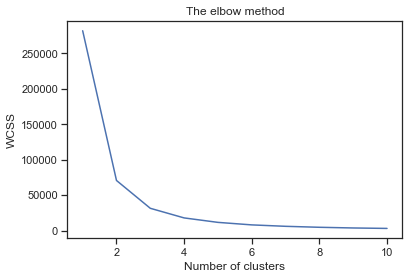

In [25]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Applying kmeans to the dataset / Creating the kmeans classifier**

In [23]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


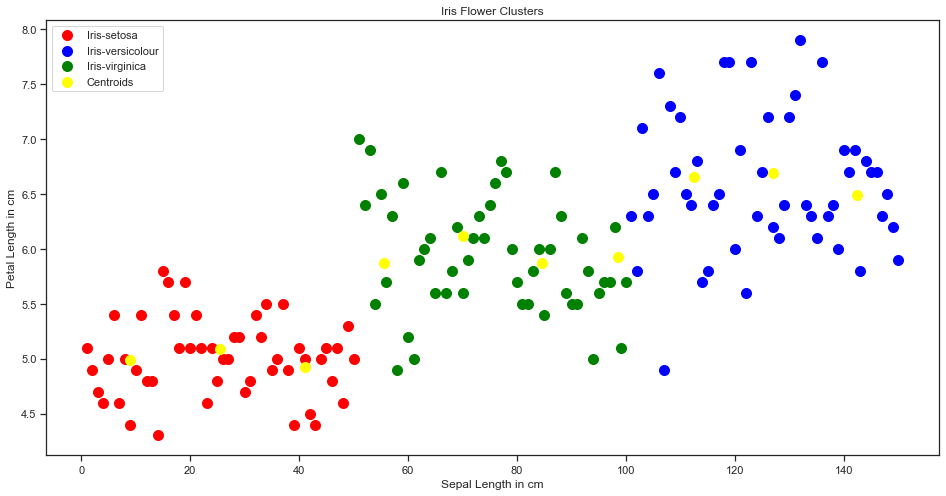

In [28]:
# Visualising the clusters - On the first two columns

plt.figure(figsize=(16,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title("K-Means")
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()